# Creation of graphs

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [2]:
pred_test_LR = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\test_predicted_LR1.csv')
pred_test_LLM = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\test_predicted_LLM1.csv')

<AxesSubplot: xlabel='predictions', ylabel='Count'>

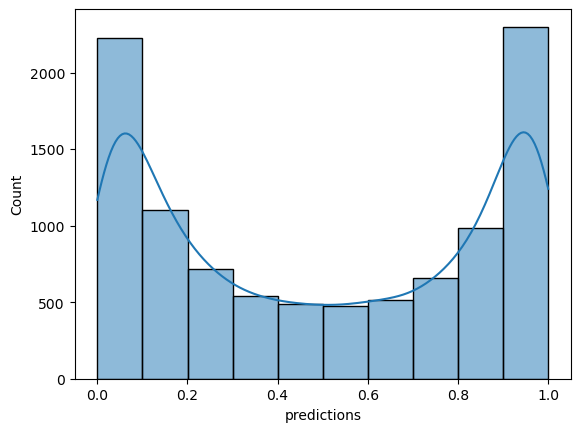

In [6]:
sns.histplot(pred_test_LR['predictions'], bins=10, kde=True)

<AxesSubplot: xlabel='predictions', ylabel='Count'>

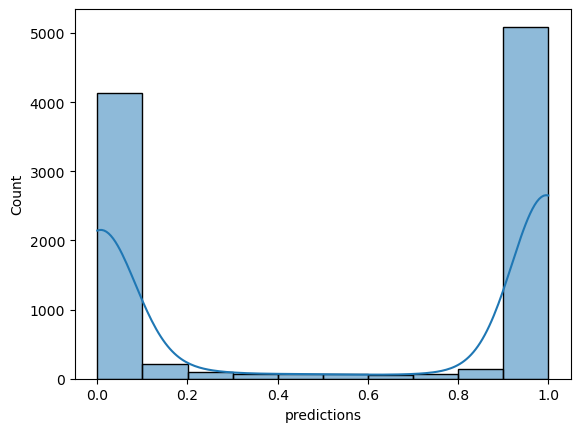

In [7]:
sns.histplot(pred_test_LLM['predictions'], bins=10, kde=True)

## ROC curve

In [8]:
pred_test_LLM['pred_label'] = pred_test_LLM['predictions'].apply(lambda x: 1 if x>=0.5 else 0)
pred_test_LR['pred_label'] = pred_test_LR['predictions'].apply(lambda x: 1 if x>=0.5 else 0)

In [19]:
fpr_lr, tpr_lr, _ = roc_curve(pred_test_LR['label'], pred_test_LR['predictions'])
fpr_llm, tpr_llm, _ = roc_curve(pred_test_LLM['label'], pred_test_LLM['predictions'])

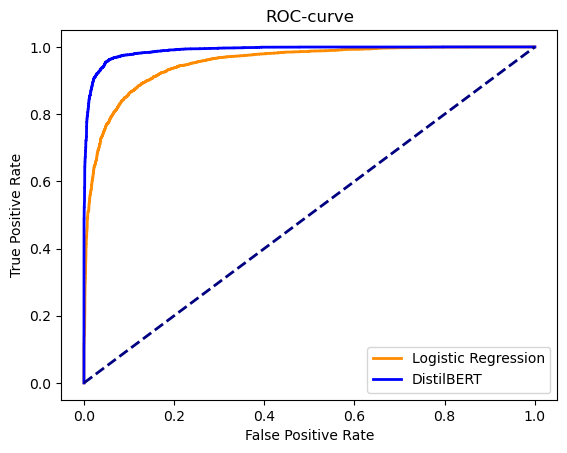

In [32]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression')
plt.plot(fpr_llm, tpr_llm, color='blue', lw=2, label='DistilBERT')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
#plt.show()
plt.savefig(r'C:\Users\Sten\Documents\EUR BAM\Thesis\graphs\roc.png')

In [36]:
auc_llm = auc(fpr_llm, tpr_llm)
print('AUC for DistilBERT:', round(auc_llm, 2))
auc_lr = auc(fpr_lr, tpr_lr)
print('AUC for logistic regression:', round(auc_lr, 2))

AUC for DistilBERT: 0.99
AUC for logistic regression: 0.95
